<h1> Exploratory Data Analysis </h1>

We will be using the iris data set for this Analysis. This is a well-known data set containing iris species and sepal and petal measurements. The data we will use are in a file called iris_data.csv

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
filepath = 'iris_data.csv'
data = pd.read_csv(filepath)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


The number of data points (rows)

In [3]:
print(data.shape[0])

150


The column names

In [4]:
print(data.columns.tolist())

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


The data types for each column

In [5]:
print(data.dtypes)

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


Examine the species names and note that they all begin with 'Iris-'. Remove this portion of the name so the species name is shorter. 

In [8]:
data['species'] = data.species.str.replace('Iris-','')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


The number of each species present

In [10]:
data.species.value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

The mean, median, and quantiles and ranges (max-min) for each petal and sepal measurement.

In [17]:
stats_df = data.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

out_fields = ['mean', '25%','50%','75%','range']

stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace = True)
stats_df

,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054,3.758667,1.198667
25%,5.100000,2.800,1.600000,0.300000
median,5.800000,3.000,4.350000,1.300000
75%,6.400000,3.300,5.100000,1.800000
range,3.600000,2.400,5.900000,2.400000


Calculate the following **for each species** in a separate dataframe:

* The mean of each measurement (sepal_length, sepal_width, petal_length, and petal_width).
* The median of each of these measurements.

In [18]:
data.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [19]:
data.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [21]:
data.groupby('species').agg(['mean','median'])
data.groupby('species').agg([np.mean, np.median])

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

Make a scatter plot of sepal_length vs sepal_width using Matplotlib. Label the axes and give the plot a title.

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

[Text(0, 0.5, 'Sepal Width(cm)'),
 Text(0.5, 0, 'Sepal Length(cm)'),
 Text(0.5, 1.0, 'Sepal Length Vs Sepal Width')]

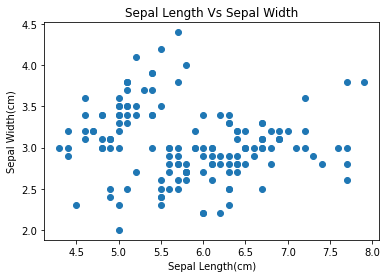

In [24]:
ax = plt.axes()

ax.scatter(data.sepal_length, data.sepal_width)

ax.set(xlabel = 'Sepal Length(cm)',
      ylabel = 'Sepal Width(cm)',
      title = 'Sepal Length Vs Sepal Width')

Make a histogram of any one of the four features. Label axes and title it as appropriate.

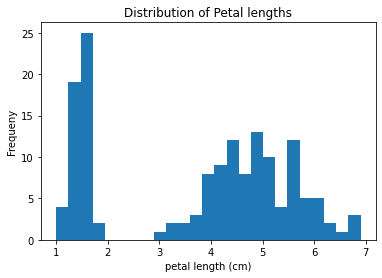

In [27]:
ax= plt.axes()

ax.hist(data.petal_length, bins = 25);

ax.set(xlabel = 'petal length (cm)',
      ylabel = 'Frequeny',
      title = 'Distribution of Petal lengths');

Create a single plot with histograms for each feature (petal_width, petal_length, sepal_width, sepal_length) overlayed.

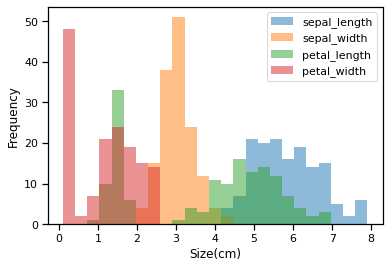

In [31]:
import seaborn as sns
sns.set_context('notebook')

ax = data.plot.hist(bins= 25, alpha = 0.5)
ax.set(xlabel = 'Size(cm)');

create a single plot with histograms for each feature (petal_width, petal_length, sepal_width, sepal_length) overlayed.

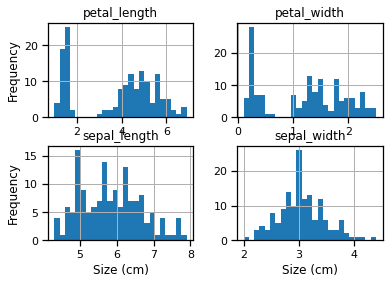

In [33]:
axList = data.hist(bins=25)
for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Size (cm)')
        
    if ax.is_first_col():
        ax.set_ylabel('Frequency')

Using Pandas, make a boxplot of each petal and sepal measurement.

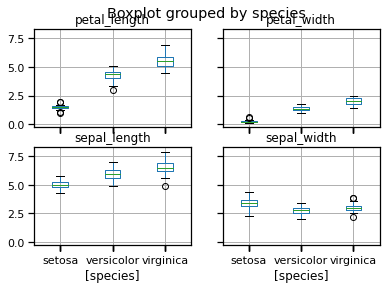

In [36]:
data.boxplot(by = 'species');

Now make a single boxplot where the features are separated in the x-axis and species are colored with different hues. 

In [37]:
plot_data = (data
            .set_index('species')
            .stack()
            .to_frame()
            .reset_index()
            .rename(columns={0:'size', 'level_1':'measurement'})
            )

In [38]:
plot_data.head()

,species,measurement,size
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9


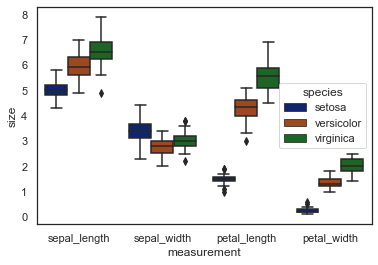

In [39]:
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize=(6,4))
sns.boxplot(x='measurement', y='size', 
            hue='species', data=plot_data);

Make a pairplo with Seaborn to examine the correlation between each of the measurements.

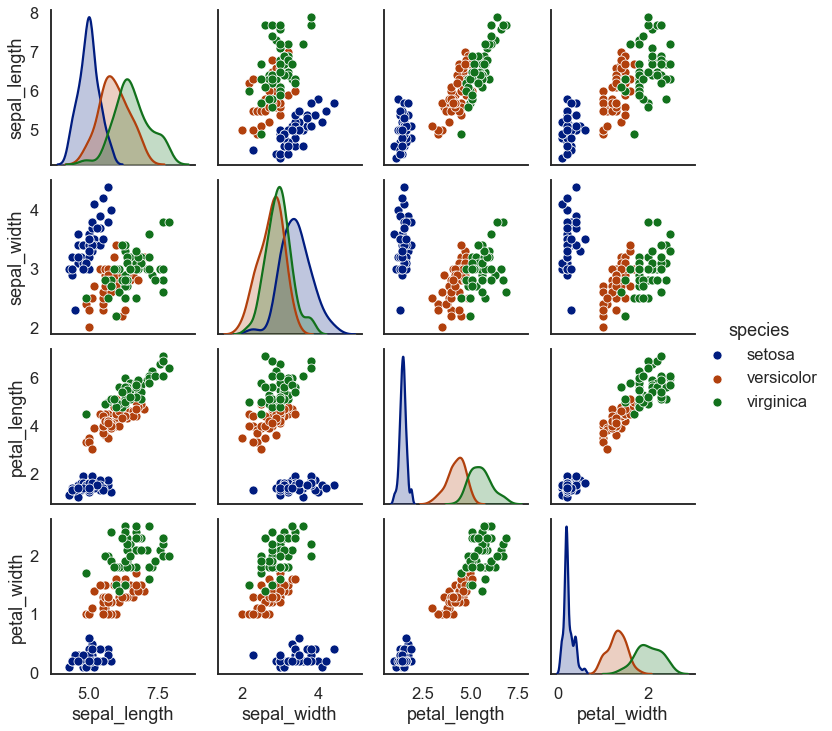

In [40]:
sns.set_context('talk')
sns.pairplot(data, hue='species');